## Classification Boundary Visualization

Dataset: 1025 patients
Risk distribution with boundaries (≤0.31, ≥0.78):
risk_category
High-Risk    355
Low-Risk     346
Med-Risk     324
Name: count, dtype: int64


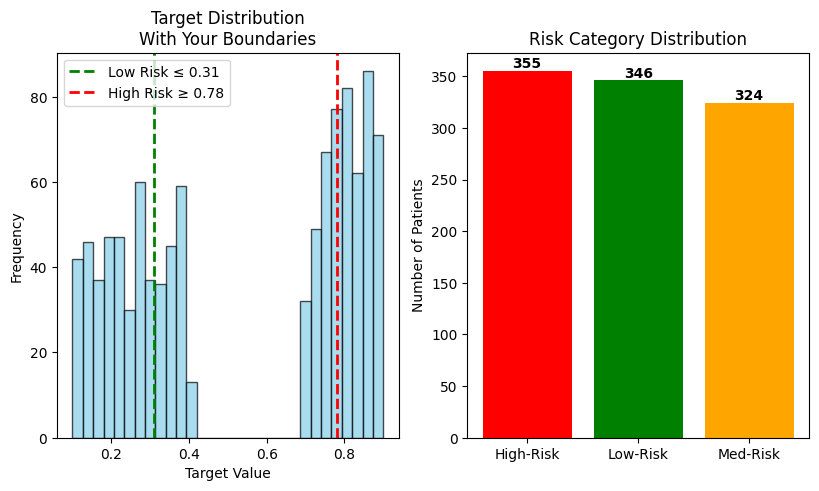

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_csv('/content/heart.csv')
df_clean = df.dropna(axis=1, how='all').dropna()

print(f"Dataset: {len(df_clean)} patients")

# boundaries
def categorize_risk(target_value):
    if target_value <= 0.31:
        return 'Low-Risk'
    elif target_value >= 0.78:
        return 'High-Risk'
    else:
        return 'Med-Risk'

df_clean['risk_category'] = df_clean['target'].apply(categorize_risk)

print("Risk distribution with boundaries (≤0.31, ≥0.78):")
risk_dist = df_clean['risk_category'].value_counts()
print(risk_dist)

# Prepare features and target
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
            'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = df_clean[features]
y = df_clean['risk_category']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualization
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
# Target distribution with your boundaries
plt.hist(df_clean['target'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(x=0.31, color='green', linestyle='--', linewidth=2, label='Low Risk ≤ 0.31')
plt.axvline(x=0.78, color='red', linestyle='--', linewidth=2, label='High Risk ≥ 0.78')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.title('Target Distribution\nWith Your Boundaries')
plt.legend()

plt.subplot(1, 3, 2)
# Risk category distribution
colors = ['red', 'green', 'orange']
plt.bar(risk_dist.index, risk_dist.values, color=colors)
plt.title('Risk Category Distribution')
plt.ylabel('Number of Patients')
for i, v in enumerate(risk_dist.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')
plt.show()

# Interpretation:

- The samples in the risk category sections are balanced.
- A lack of samples can be observed in between the target range of 0.43 and 0.68 approximately.
- Binary classification can be used for the ML model trained with this dataset however since the majority of the stakeholders requested a multi-classification system the heart disease risk prediction ML model will be a multi-classification model.

# Testing for the best classification model

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load data
df = pd.read_csv('/content/heart.csv')

# Create the 3 risk categories based on Health Score (target)
# Low Health Score -> High Risk
# Med Health Score -> Med Risk
# High Health Score -> Low Risk

# Using qcut to ensure balanced classes
df['risk_level'] = pd.qcut(df['target'], q=3, labels=['High Risk', 'Med Risk', 'Low Risk'])

# Prepare features and target
X = df.drop(['target', 'risk_level'], axis=1)
y = df['risk_level']

# Encode the target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
# Label mapping: Low Risk: 0, Med Risk: 1, High Risk: 2

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(multi_class='multinomial', max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

# Evaluate models
results = {}
for name, model in models.items():
    if name in ["Logistic Regression", "SVM", "KNN"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)
print(results_df)

# Check class distribution to ensure it's balanced
print("\nClass Distribution:")
print(df['risk_level'].value_counts())

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


                 Model  Accuracy
4        Decision Tree  0.585366
1        Random Forest  0.551220
5    Gradient Boosting  0.541463
2                  SVM  0.497561
3                  KNN  0.487805
0  Logistic Regression  0.448780
6          Naive Bayes  0.448780

Class Distribution:
risk_level
Med Risk     358
High Risk    346
Low Risk     321
Name: count, dtype: int64


# Interpretation
- The accuracy of all the models are too low to provide accurate predictions which are up to medical standard
- will test binary classification as well to see whether the accuracy improves

# Testing for the best binary classification model

/tmp/ipython-input-2892244016.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=binary_results_df, palette='magma')


Binary Classification Results:
                 Model  Accuracy
1        Random Forest  0.985366
4        Decision Tree  0.985366
5    Gradient Boosting  0.931707
2                  SVM  0.887805
3                  KNN  0.834146
0  Logistic Regression  0.795122

Class Distribution (0=Low Risk, 1=High Risk):
binary_risk
0    526
1    499
Name: count, dtype: int64

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       103
           1       0.97      1.00      0.99       102

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



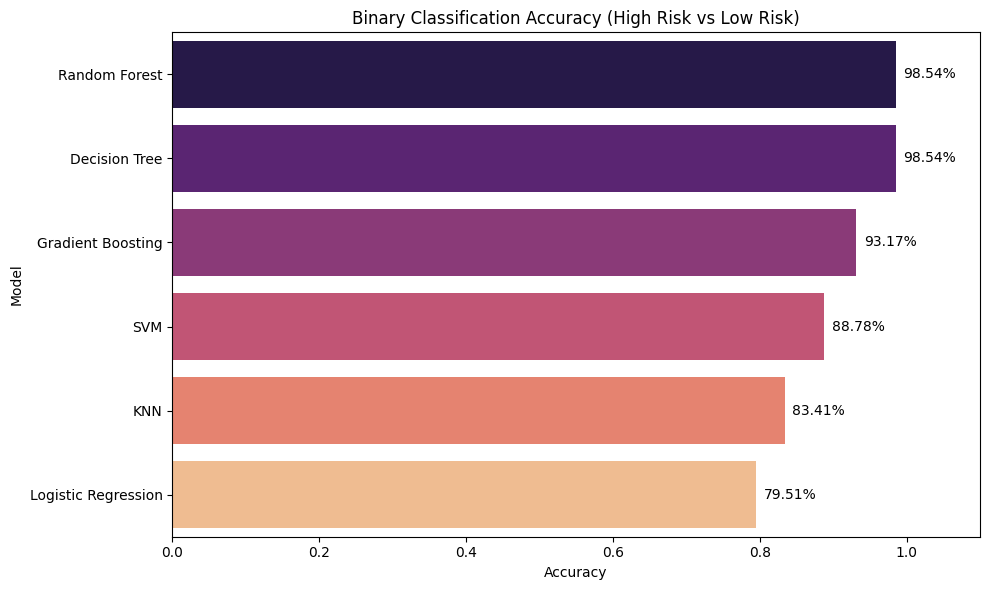

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load data
df = pd.read_csv('/content/heart.csv')

# Define Risk Score (1 - Health Score)
df['risk_score'] = 1 - df['target']

# Binary target: 1 if risk_score >= 0.5 (High Risk), 0 if risk_score < 0.5 (Low Risk)
df['binary_risk'] = (df['risk_score'] >= 0.5).astype(int)

# Prepare features and target
X = df.drop(['target', 'risk_score', 'binary_risk'], axis=1)
y = df['binary_risk']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Evaluate models
binary_results = {}
for name, model in models.items():
    if name in ["Logistic Regression", "SVM", "KNN"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    binary_results[name] = acc

binary_results_df = pd.DataFrame(list(binary_results.items()), columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=binary_results_df, palette='magma')
plt.title('Binary Classification Accuracy (High Risk vs Low Risk)')
plt.xlim(0, 1.1)
for i, v in enumerate(binary_results_df['Accuracy']):
    plt.text(v + 0.01, i, f"{v:.2%}", color='black', va='center')
plt.tight_layout()
plt.savefig('binary_model_accuracy.png')

print("Binary Classification Results:")
print(binary_results_df)

# Class balance check
print("\nClass Distribution (0=Low Risk, 1=High Risk):")
print(df['binary_risk'].value_counts())

# Detailed Report for the best model
best_model_name = binary_results_df.iloc[0]['Model']
best_model = models[best_model_name]
if best_model_name in ["Logistic Regression", "SVM", "KNN"]:
    y_pred_best = best_model.predict(X_test_scaled)
else:
    y_pred_best = best_model.predict(X_test)

print(f"\nClassification Report for {best_model_name}:")
print(classification_report(y_test, y_pred_best))

# Intepretation
- Both Random Forest Tree and Decision Tree models are sufficiently accurate (> 0.95).
- The precision and recall of the RF model are very high which shows that the model wont identify a false patient to be of high risk or vice versa.